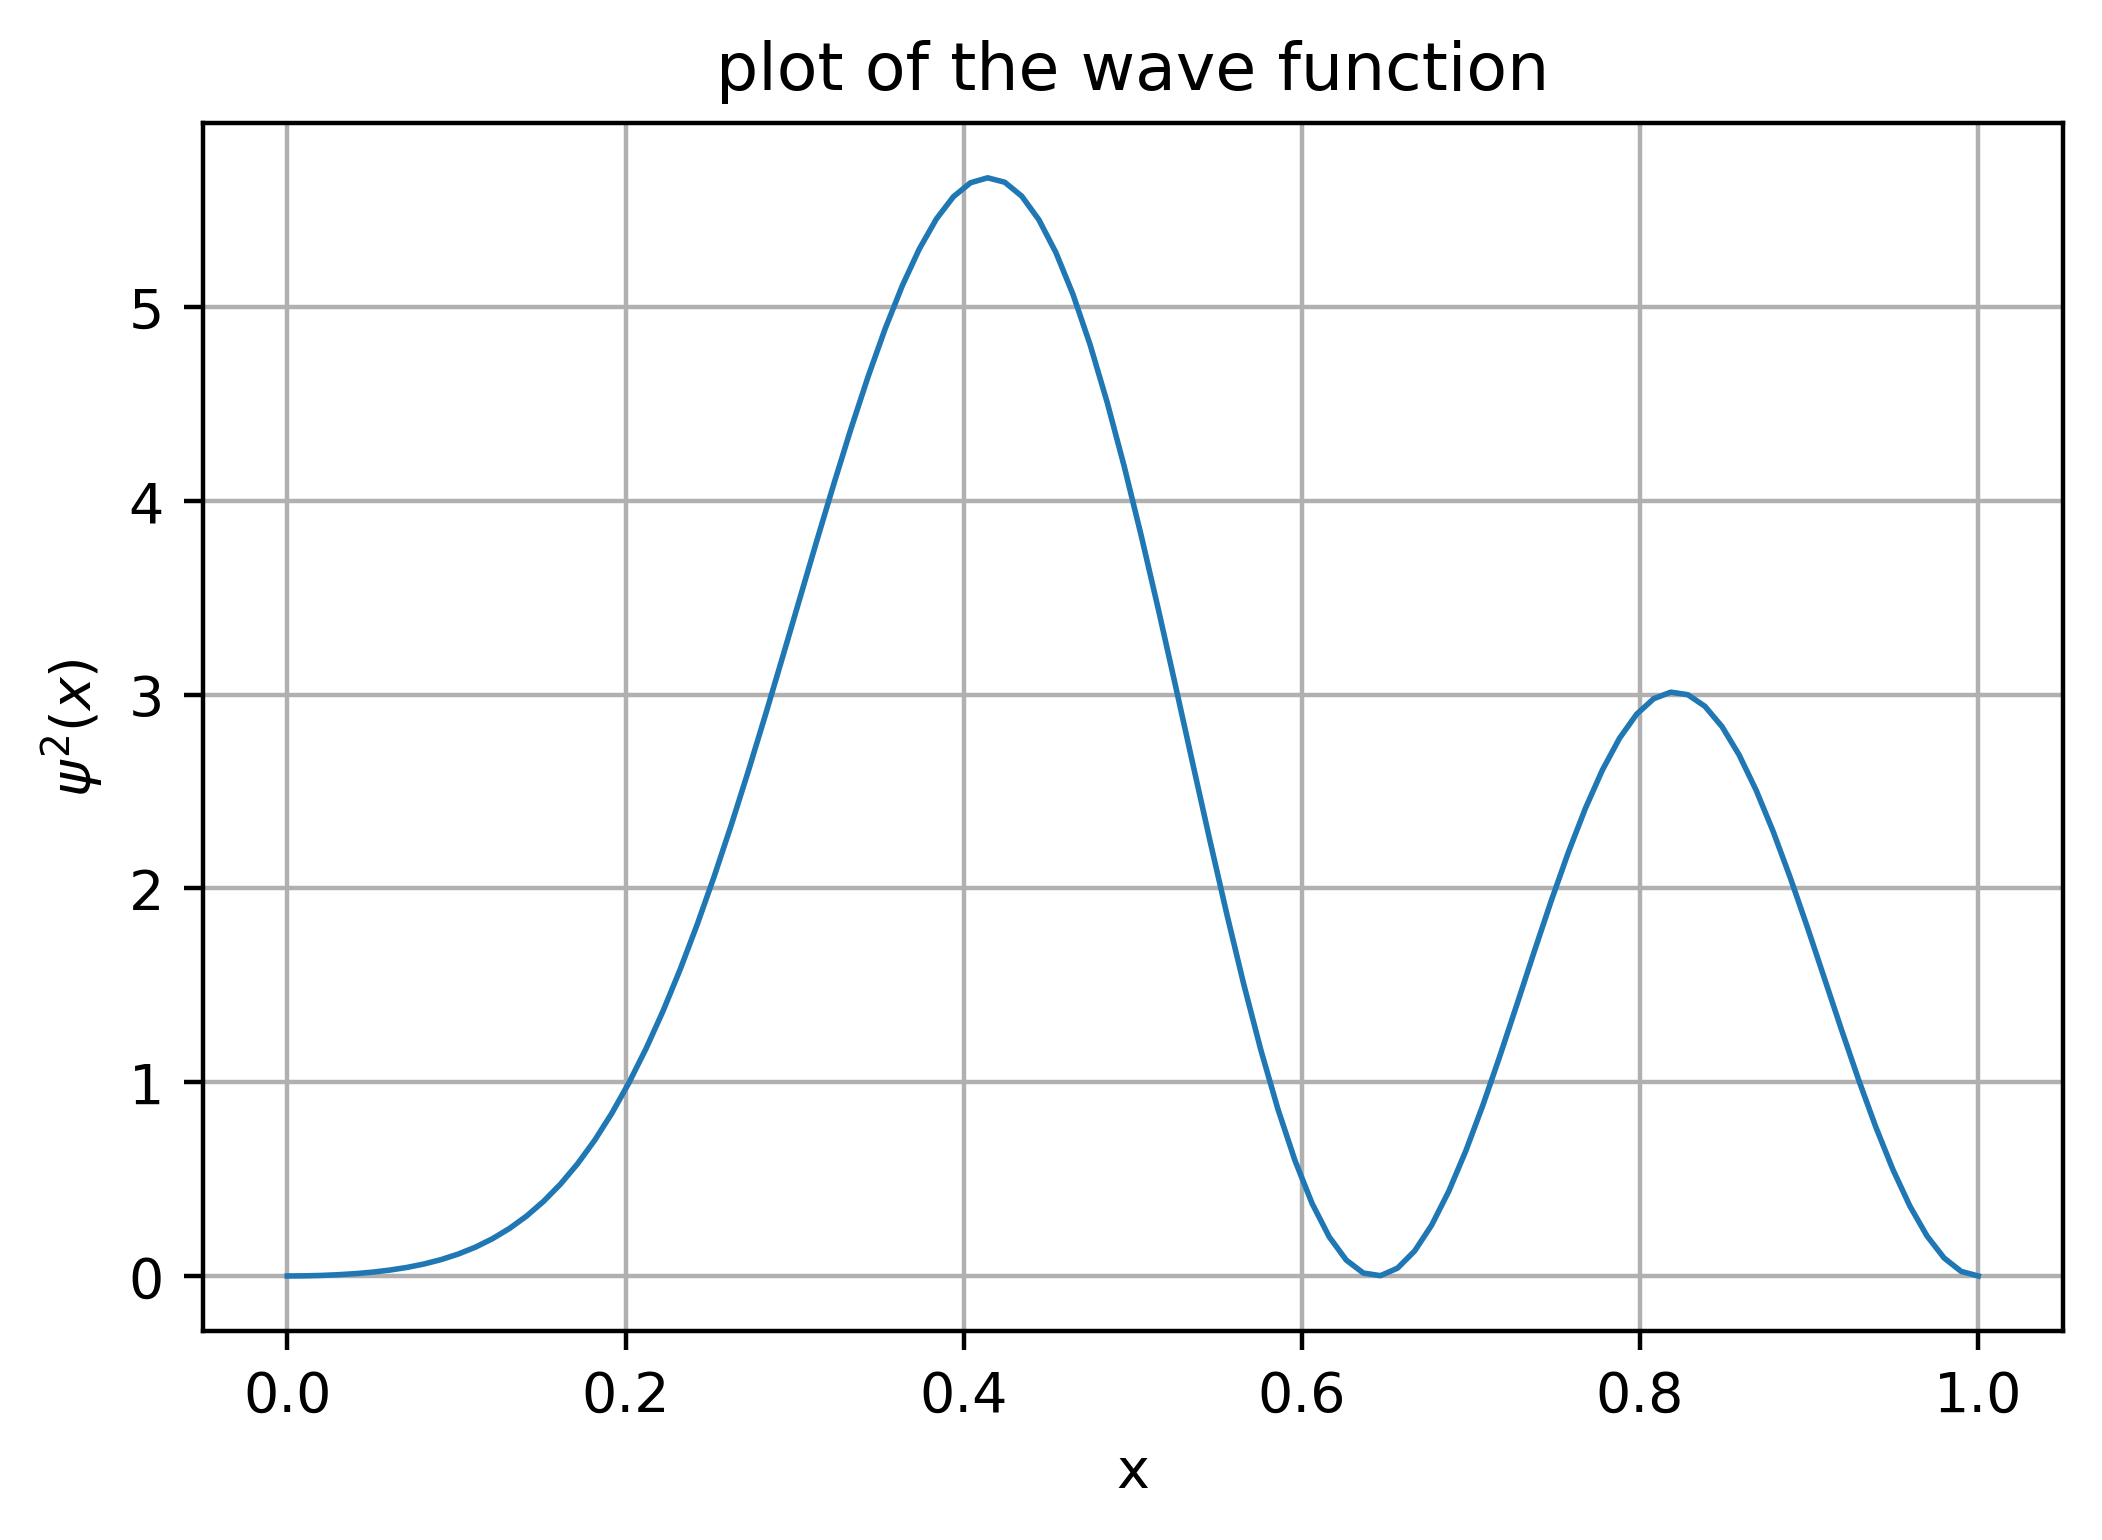

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l = 1
pi = np.pi
x = np.linspace(0,l,100)

def psi(x):
    return (np.sin(pi*x/l) + np.sqrt(2) * np.sin(2*pi*x/l) - np.sin(3*pi*x/l))**2

plt.figure(dpi=400)
plt.title("plot of the wave function")
plt.grid()
plt.ylabel("$\psi^2 (x)$")
plt.xlabel("x")
plt.plot(x,psi(x),lw=1)
plt.savefig("wavefun.png")

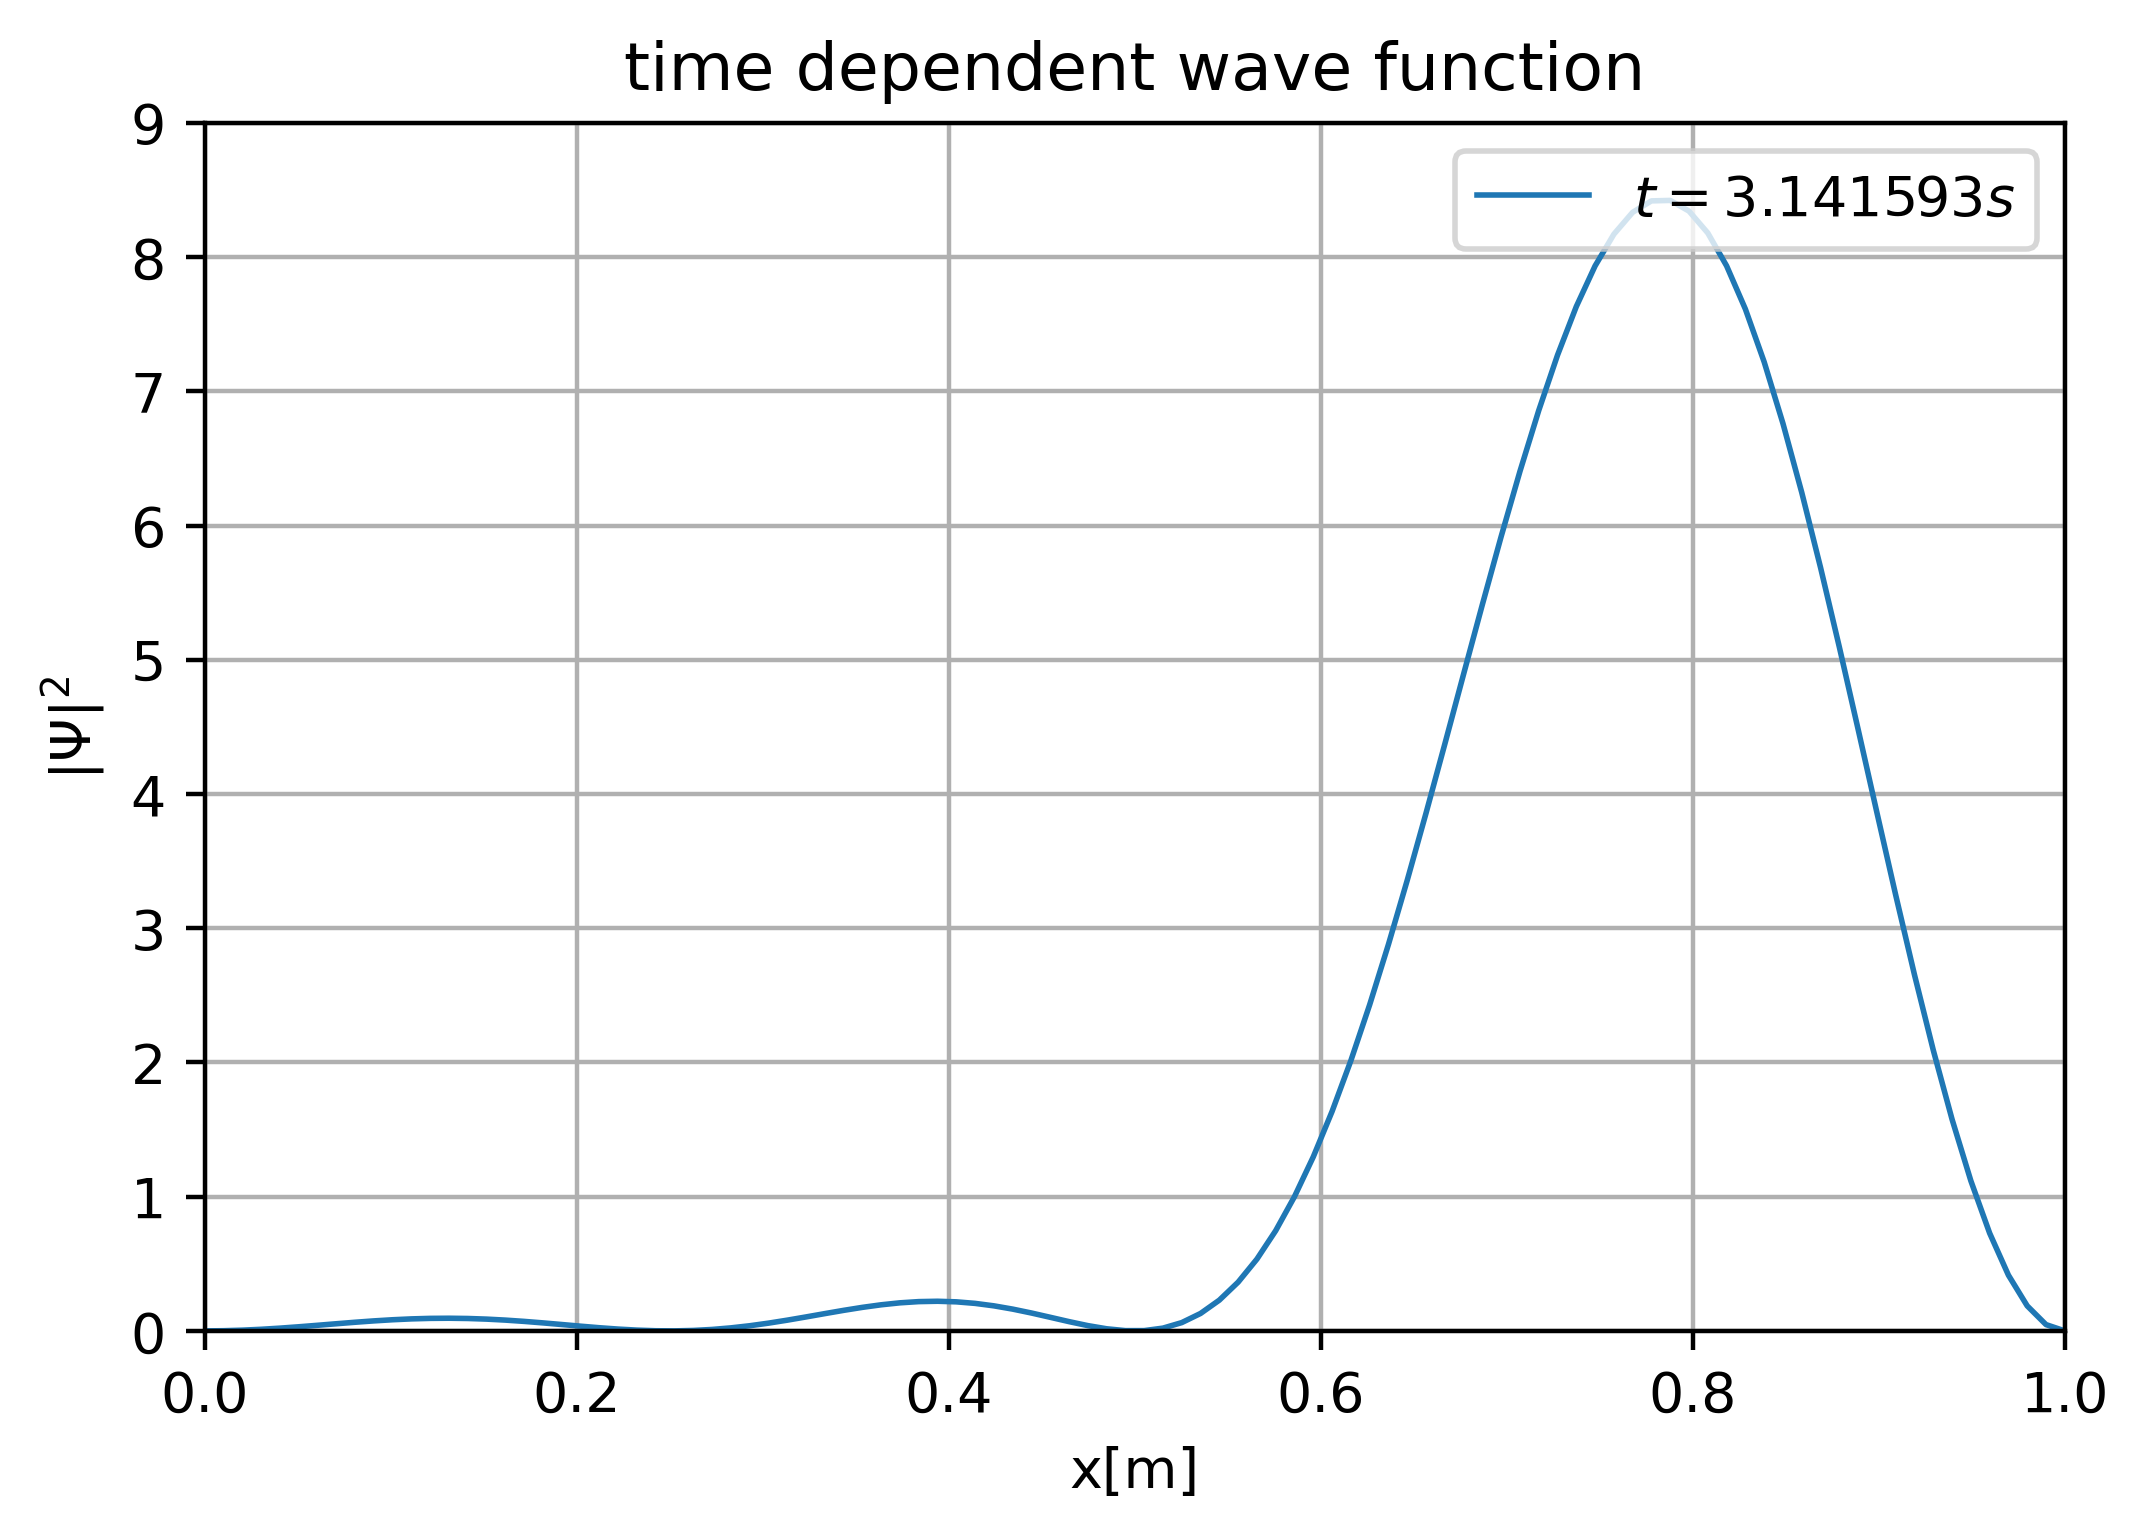

In [2]:
###Plot von psi_t
import random
from matplotlib import animation
w = 1
t = np.linspace(0,np.pi/w,100)



def psit(x,t):
    psi = np.exp(-1j*w*t) * np.sin(np.pi*x/l) + np.sqrt(2)*np.exp(-4j*w*t) * np.sin(2*np.pi*x/l) + np.exp(-9j*w*t) * np.sin(3*np.pi*x/l)
    return np.abs(psi)**2
    
    
fig = plt.figure(dpi = 400)
ax = plt.axes()
line, = ax.plot([], [], lw=1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    ax.clear()
  

    
    ax.set_xlim(0,1)
    ax.set_ylim(0,9)
    ax.plot(x,psit(x,t[i]),label = "$t=%f s$" %t[i],linewidth = 1)
    
    plt.title("time dependent wave function")
    plt.grid()
    plt.ylabel("$|\Psi|^2$")
    plt.xlabel('x[m]')
    plt.legend(loc=1)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100,  blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('wavefunc.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

plt.show()
